In [63]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16  # You can set any numeric value here

In [64]:
problem_s_exageostat = [40000, 60000, 80000] #90000, 100000]
time_exageostat = [7.041170, 19.291832, 41.007014] #, 95.060418, 163.929003]
# gflop_exageostat = [5021.949664, 5541.964717, 5563.146135, 3716.191701, 2698.969065]

In [65]:
# cs_set = [16, 32, 64, 84, 108, 128]
cs_set = [10, 30, 60, 90, 120, 150]
num_set = np.asarray("40000 80000 120000 160000 200000 280000 360000 420000 500000 600000 700000 800000 900000 1000000".split(" "), dtype=int)
filename_template = 'perf_locs_{}_cs_{}'
file_folder = './log/v100'

perf_glops = [[ ] for _ in range(len(cs_set))]
perf_time = [[ ] for _ in range(len(cs_set))]
for j, cs in enumerate(cs_set):
    for _, locs_num in enumerate(num_set):
        filename = filename_template.format(locs_num, cs)
        file_path = os.path.join(file_folder, filename)
        # Open the file
        try:
            with open(file_path, 'r') as file:
                # Read all lines into a list
                lines = file.readlines()

                # Access the third and sixth lines
                time_total = float(lines[2].strip().split(" ")[0]) #- float(lines[2].strip().split("        ")[1])
                gflop_ops = float(lines[5].strip().split(" ")[0])
                
                perf_glops[j].append(gflop_ops)
                perf_time[j].append(time_total)
        except FileNotFoundError:
            print(f"The file {file_path} does not exist.")

The file ./log/v100/perf_locs_500000_cs_90 does not exist.
The file ./log/v100/perf_locs_600000_cs_90 does not exist.
The file ./log/v100/perf_locs_700000_cs_90 does not exist.
The file ./log/v100/perf_locs_800000_cs_90 does not exist.
The file ./log/v100/perf_locs_900000_cs_90 does not exist.
The file ./log/v100/perf_locs_1000000_cs_90 does not exist.
The file ./log/v100/perf_locs_280000_cs_120 does not exist.
The file ./log/v100/perf_locs_360000_cs_120 does not exist.
The file ./log/v100/perf_locs_420000_cs_120 does not exist.
The file ./log/v100/perf_locs_500000_cs_120 does not exist.
The file ./log/v100/perf_locs_600000_cs_120 does not exist.
The file ./log/v100/perf_locs_700000_cs_120 does not exist.
The file ./log/v100/perf_locs_800000_cs_120 does not exist.
The file ./log/v100/perf_locs_900000_cs_120 does not exist.
The file ./log/v100/perf_locs_1000000_cs_120 does not exist.
The file ./log/v100/perf_locs_200000_cs_150 does not exist.
The file ./log/v100/perf_locs_280000_cs_150 

/tmp/ipykernel_3834/910882752.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


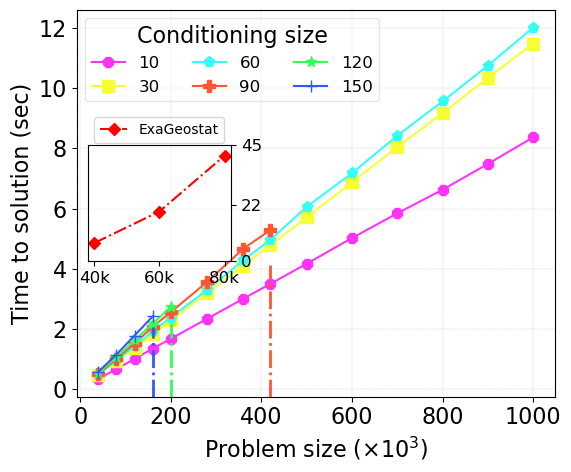

In [66]:
# Create a plot with a larger size and a better style
plt.figure(figsize=(6, 5))

# colors = cm.Greens(np.linspace(0.2, 0.8, len(num_set)))
colors = [
    "#FF33F6",  # Magenta
    "#F6FF33",  # Yellow
    "#33FFF6",  # Cyan
    "#FF5733",  # Reddish-orange
    "#33FF57",  # Bright green
    "#3357FF",  # Royal blue
    "#8B4513",  # Saddle brown
    "#FF69B4"   # Hot pink
]
markers = ["8", "s", "p", "P", "*", "+", "D", "v", "^"]
# Plot both arrays with different colors and line styles
for i, num_cs in enumerate(cs_set):
    _yy = perf_time[i]
    plt.plot(np.asarray(num_set[:len(_yy)])/1000, np.asarray(_yy), color=colors[i], 
             linewidth=1.5, marker=markers[i], label=str(num_cs), markersize=8)
# tick modification
_list_xtick = [40, 200, 420, 600, 800, 1000]
# _list_xtick_name = [f'{int(tick)}k' for tick in _list_xtick]
# plt.xticks(_list_xtick, _list_xtick_name)
plt.axvline(160, ymin=0, ymax=0.18, color=colors[len(cs_set) - 1], linestyle='-.', linewidth=2.0)
plt.axvline(200, ymin=0, ymax=0.19, color=colors[len(cs_set) - 2], linestyle='-.', linewidth=2.0)
plt.axvline(420, ymin=0, ymax=0.34, color=colors[len(cs_set) - 3], linestyle='-.', linewidth=2.0)
# plt.yscale('log')

# Adding enhanced legend, title, and labels
legend = plt.legend(ncol = 3, fontsize=12,
                    title = 'Conditioning size') #loc='lower center', bbox_to_anchor=(0.5, -0.3) 
legend.get_frame().set_alpha(0.5)  # 50% transparency
plt.xlabel(r'Problem size ($\times 10^3$)')
plt.ylabel('Time to solution (sec)')

# Adding grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.2)
# plt.yscale('log')
# plt.ylim(0, 15)


def set_inner_plot():
    # Parameters: [left, bottom, width, height] as a fraction of the parent plot
    ax_inset = inset_axes(plt.gca(), width="30%", height="30%", 
                          loc='center left')

    # Now plot on the inset axes. Example:
    ax_inset.plot(np.asarray(problem_s_exageostat)/1000, time_exageostat, linestyle='-.',
                  color='red', linewidth=1.5, marker=markers[i+1], label = 'ExaGeostat')
    ax_inset.patch.set_alpha(0.5)  # 50% transparent
    # ax_inset.grid(True, which='both', linestyle='--', linewidth=0.2)
    _list_xtick_exageostat = list(np.asarray([40, 60, 80]))
    ax_inset.set_xticks(_list_xtick_exageostat,
                        [f'{int(tick)}k' for tick in _list_xtick_exageostat],
                        fontsize = 12)
    _list_ytick_exageostat = list(np.asarray([0, 22, 45]))# 60, 120, 180]))
    ax_inset.set_yticks(_list_ytick_exageostat,
                        _list_ytick_exageostat,
                        fontsize = 12)
    # # You can set properties for the inset axes if needed, like labels, title, etc.
    # ax_inset.set_xlabel('Small X label')
    # ax_inset.set_ylabel('Small Y label')
    # ax_inset.set_title('Inset Title')
    ax_inset.yaxis.tick_right()
    ax_inset.legend(loc='best', fontsize=10,  bbox_to_anchor=(1.0,1.3))

    # # Adjust the view limits or other properties of the inset
    # ax_inset.set_xlim(...) # Specify your limits here
    # ax_inset.set_ylim(...) # Specify your limits here
set_inner_plot()

plt.tight_layout()
plt.savefig(f'./fig/perf_time_v100.pdf')
plt.show()

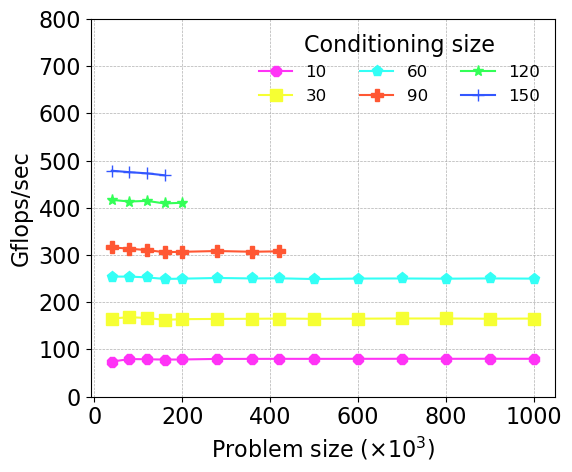

In [67]:
# Create a plot with a larger size and a better style
plt.figure(figsize=(6, 5))

# Plot both arrays with different colors and line styles
for i, num_cs in enumerate(cs_set):
    _yy = perf_glops[i]
    plt.plot(np.asarray(num_set[:len(_yy)])/1000, np.asarray(_yy), color=colors[i], 
             linewidth=1.5, marker=markers[i], label=str(num_cs), markersize=8)
# plt.axvline(160, ymin=0, ymax=0.55, color=colors[len(cs_set) - 1], linestyle='-.', linewidth=2.0)
# plt.axvline(200, ymin=0, ymax=0.5, color=colors[len(cs_set) - 2], linestyle='-.', linewidth=2.0)
# plt.axvline(420, ymin=0, ymax=0.4, color=colors[len(cs_set) - 3], linestyle='-.', linewidth=2.0)

# 500
# plt.plot(500/1000, 1313.78, color=colors[i+1], 
#         linewidth=1.5, marker=markers[i+1], label=str(500), markersize=8)
# # 1000
# plt.plot(1000/1000, 2271.97, color=colors[i+2], 
#         linewidth=1.5, marker=markers[i+2], label=str(1000), markersize=8)

# Adding enhanced legend, title, and labels
legend = plt.legend(ncol = 3, fontsize=12,
                    title = 'Conditioning size') #loc='lower center', bbox_to_anchor=(0.5, -0.3) 
legend.get_frame().set_alpha(0)  # 50% transparency
plt.xlabel(r'Problem size ($\times 10^3$)')
plt.ylabel('Gflops/sec')
plt.ylim(0, 800)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig(f'./fig/perf_gflops_v100.pdf')
plt.show()